# TP no 1 : Jeu de la vie

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import animation, rc
import warnings
warnings.filterwarnings('ignore')
from matplotlib import animation , rc
from IPython.display import HTML

In [6]:
filename='HMMA238_TP_seydousane'

In [7]:
taille_str=len(filename)
print(taille_str)

21


In [8]:
ma_graine= taille_str%6
print(ma_graine)

3


In [9]:
def calcul_nb_voisins(Z):
    forme = len(Z), len(Z[0]) 
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1]\
                    + Z[x-1][y] + 0 +Z[x+1][y]\
                    + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N 



In [10]:
Z = [[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0]]
N=calcul_nb_voisins(Z)
print(N)          

[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


In [11]:
def iteration_jeu(Z):
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

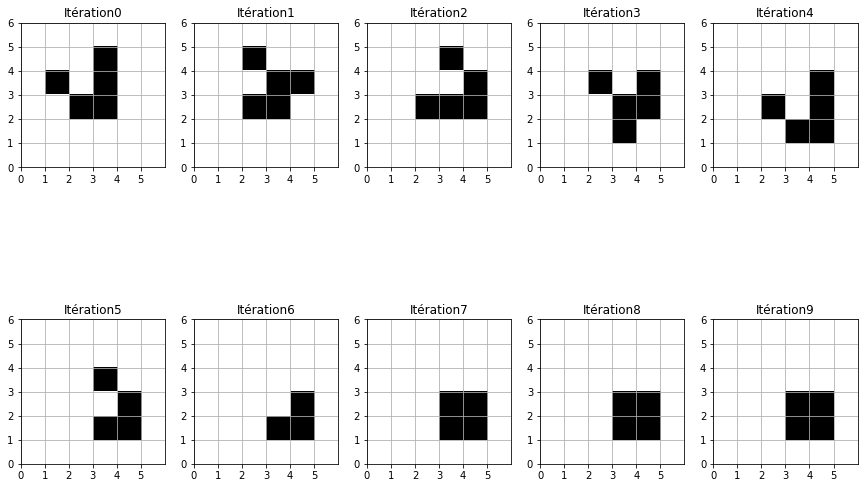

In [12]:
Z = [[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0]]
plt.subplots(figsize=(15,10))
for i in range(10):
    axs=plt.subplot(2,5,i+1)
    plt.imshow(Z,cmap="binary", extent=[0,len(Z[0]),0,len(Z)],)
    plt.grid(True)
    axs.set_xticks(range(0,len(Z[0]),1),)
    plt.title('Itération'+str(i))
    Z=iteration_jeu(Z)
plt.show()
   


In [13]:
vect= np.array([0,1,0,0,1,1])
nb_vect= np.zeros(vect.shape)   
nb_vect[1:-1]+=(vect[:-2]+vect[2:])
print(nb_vect)

[0. 0. 1. 1. 1. 0.]


In [17]:
Z=np.asarray(Z)
def calcul_nb_voisins_np(Z) :
    N = np.zeros(Z.shape)   
    N[1:-1,1:-1]=Z[0:-2,0:-2]+Z[:-2,2:]+Z[2:,:-2]+Z[:-2,1:-1]+\
                 Z[1:-1,2:]+Z[1:-1,:-2]+Z[2:,1:-1]+Z[2:,2:]
    return N 
calcul_nb_voisins_np(Z)

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 2., 2., 0.],
       [0., 0., 2., 3., 3., 0.],
       [0., 0., 2., 3., 3., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [21]:
def iteration_jeu_np(Z):
  Z=np.array(Z)
  N=calcul_nb_voisins_np(Z)
  Z[np.where((Z==1)&((N==1)|(N>3)))]=0
  Z[np.where((Z==0)&(N==3))]=1
  return Z
iteration_jeu_np(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [38]:
def jeu_np(Z_in, nb_iter):
    while nb_iter !=0:
        Z_int=iteration_jeu_np(Z_in)
        nb_iter=nb_iter-1
        return Z_in

In [10]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np